In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.DataSet import DataSet
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

In [2]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

dataset.shuffle()
train_set, test_set = dataset.stratified_split([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


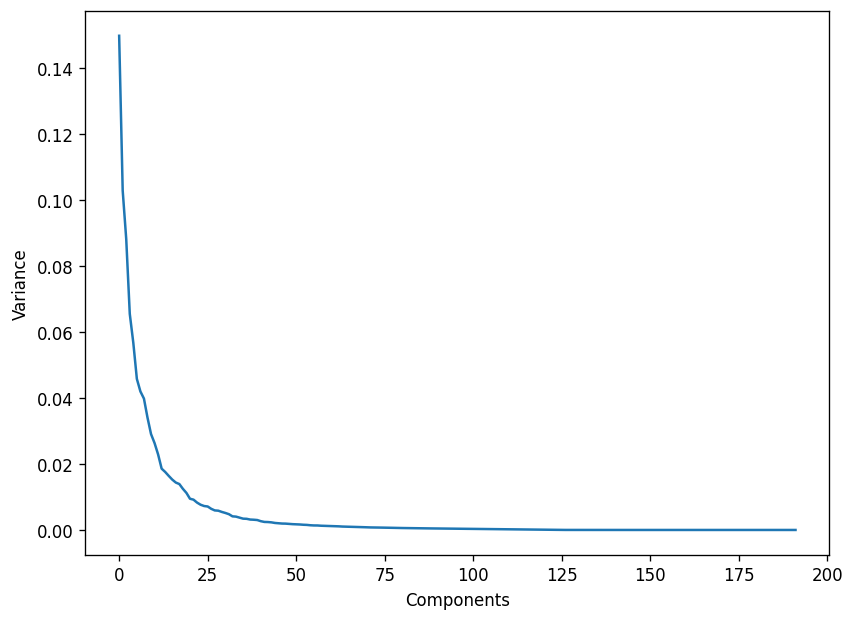

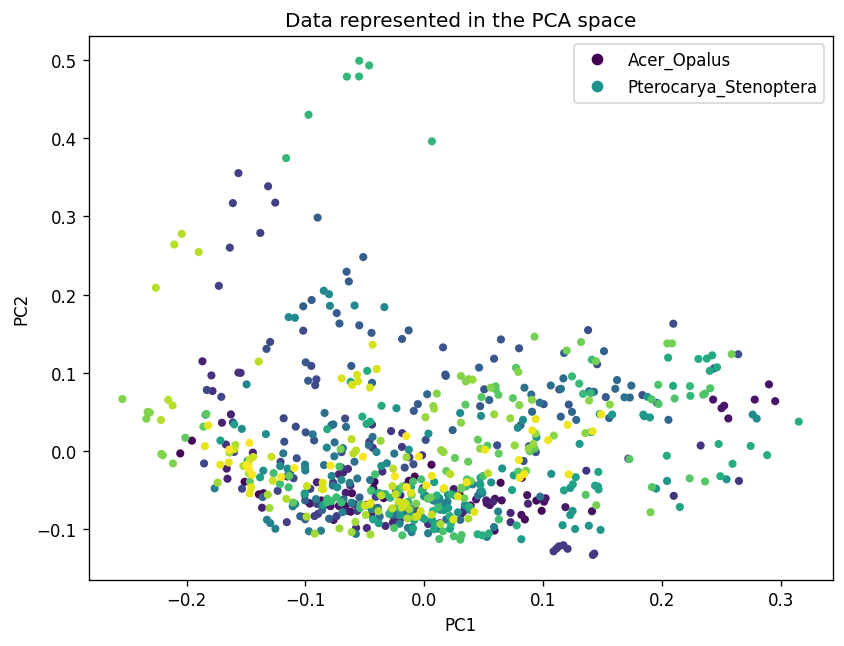

In [3]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

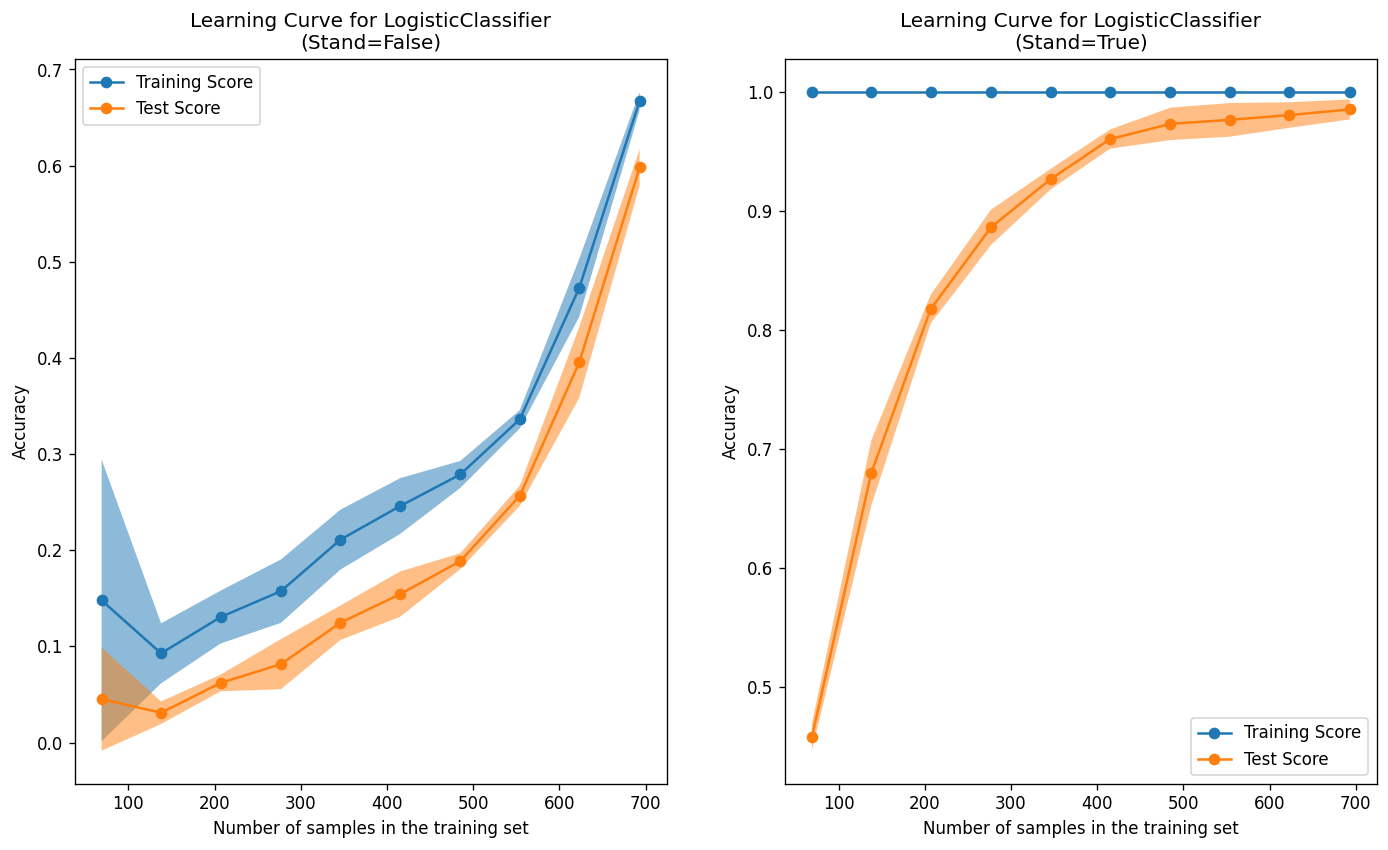

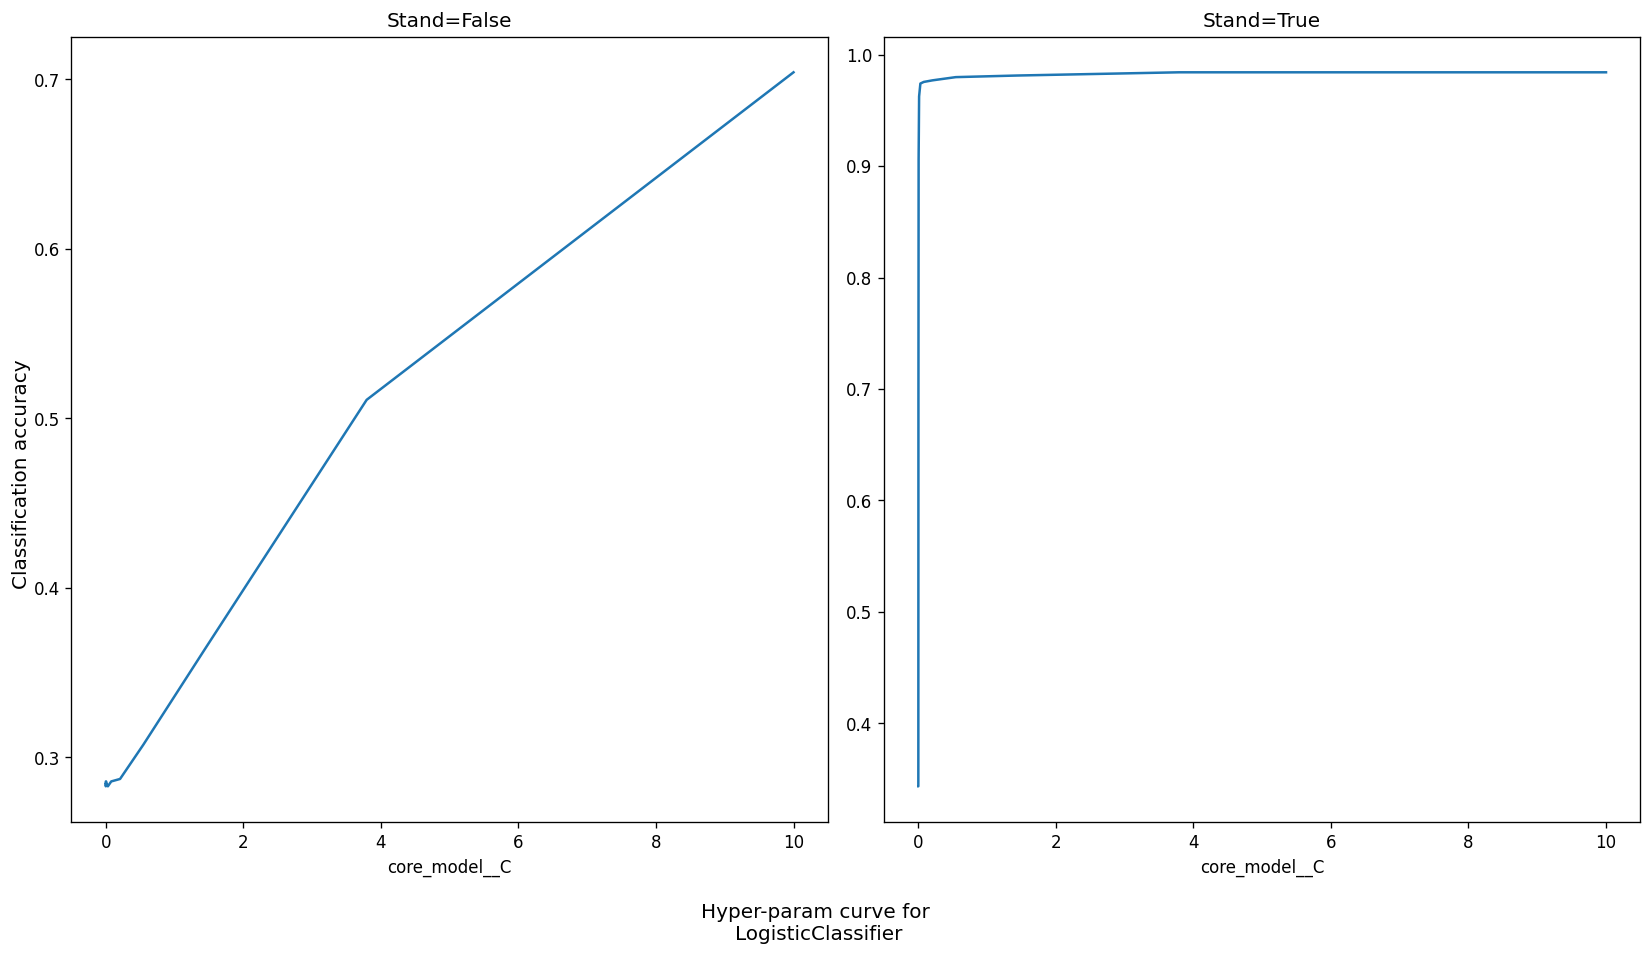

,[TRAIN] LogisticClassifier (Stand=False),[TEST] LogisticClassifier (Stand=False),[TRAIN] LogisticClassifier (Stand=True),[TEST] LogisticClassifier (Stand=True)
Accuracy,0.894661,0.828283,1.000000,0.983165
Precision,0.894661,0.828283,1.000000,0.983165
Recall,0.894661,0.828283,1.000000,0.983165
F1 Score,0.894661,0.828283,1.000000,0.983165
ROC AUC,0.997777,0.994732,1.000000,0.999977
Log loss,2.394897,2.526197,0.008879,0.081565


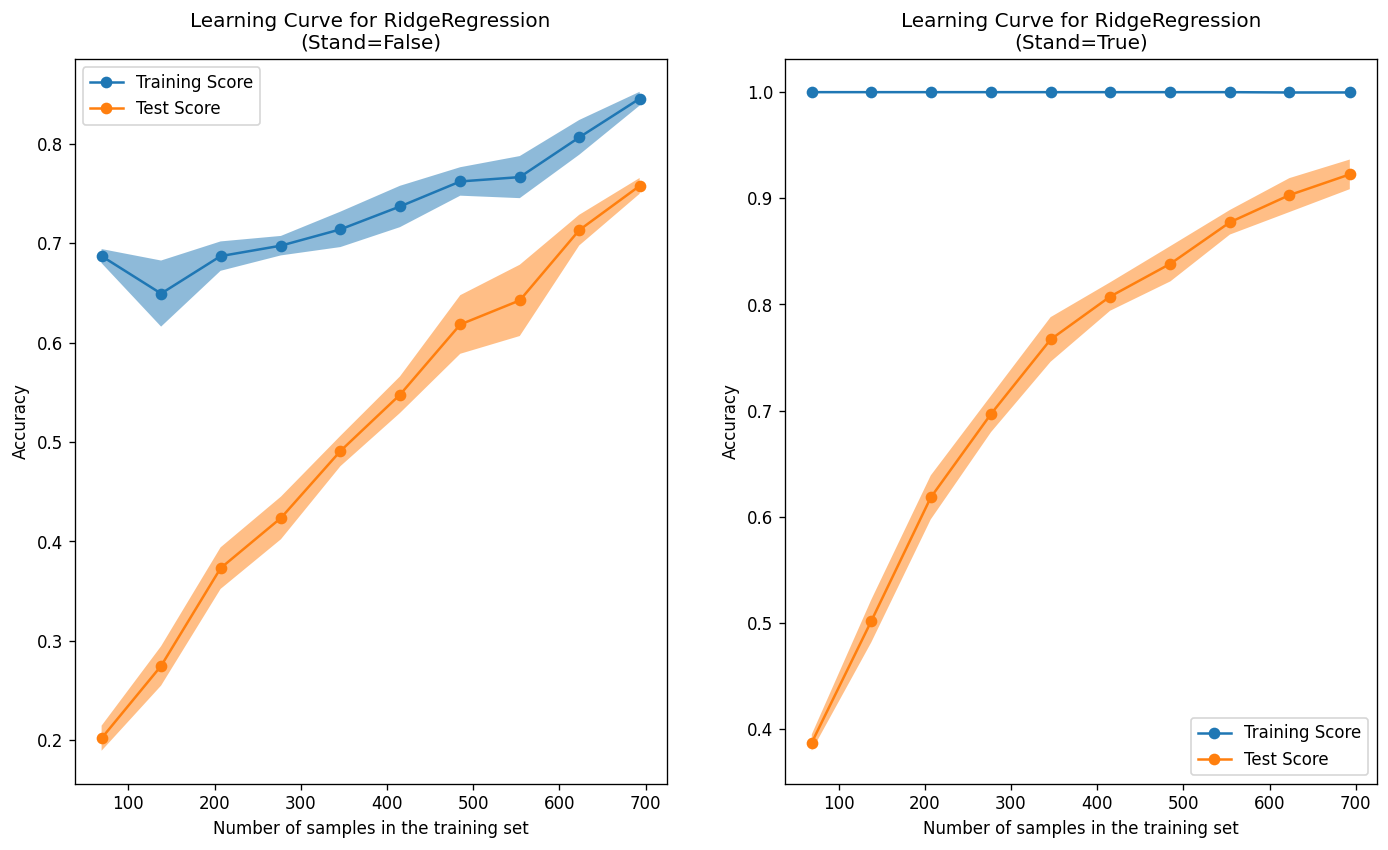

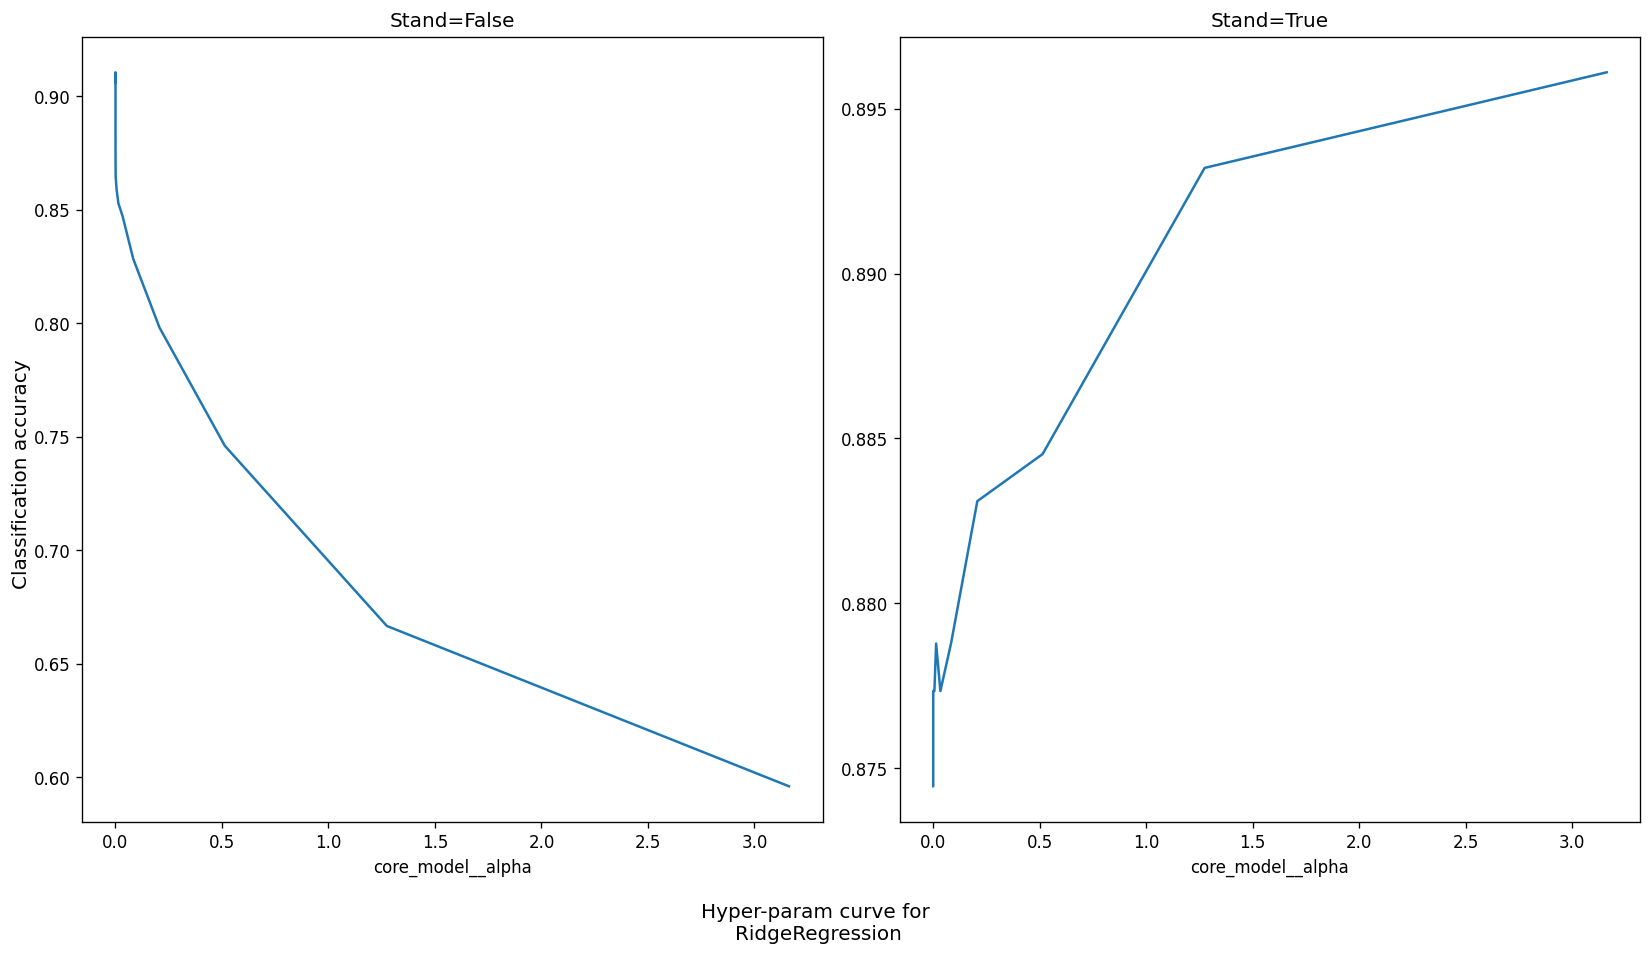

,[TRAIN] RidgeRegression (Stand=False),[TEST] RidgeRegression (Stand=False),[TRAIN] RidgeRegression (Stand=True),[TEST] RidgeRegression (Stand=True)
Accuracy,0.9956709956709957,0.9225589225589226,0.9956709956709957,0.9225589225589226
Precision,0.9956709956709957,0.9225589225589226,0.9956709956709957,0.9225589225589226
Recall,0.9956709956709957,0.9225589225589226,0.9956709956709957,0.9225589225589226
F1 Score,0.9956709956709957,0.9225589225589226,0.9956709956709957,0.9225589225589226
ROC AUC,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable,Not Applicable,Not Applicable


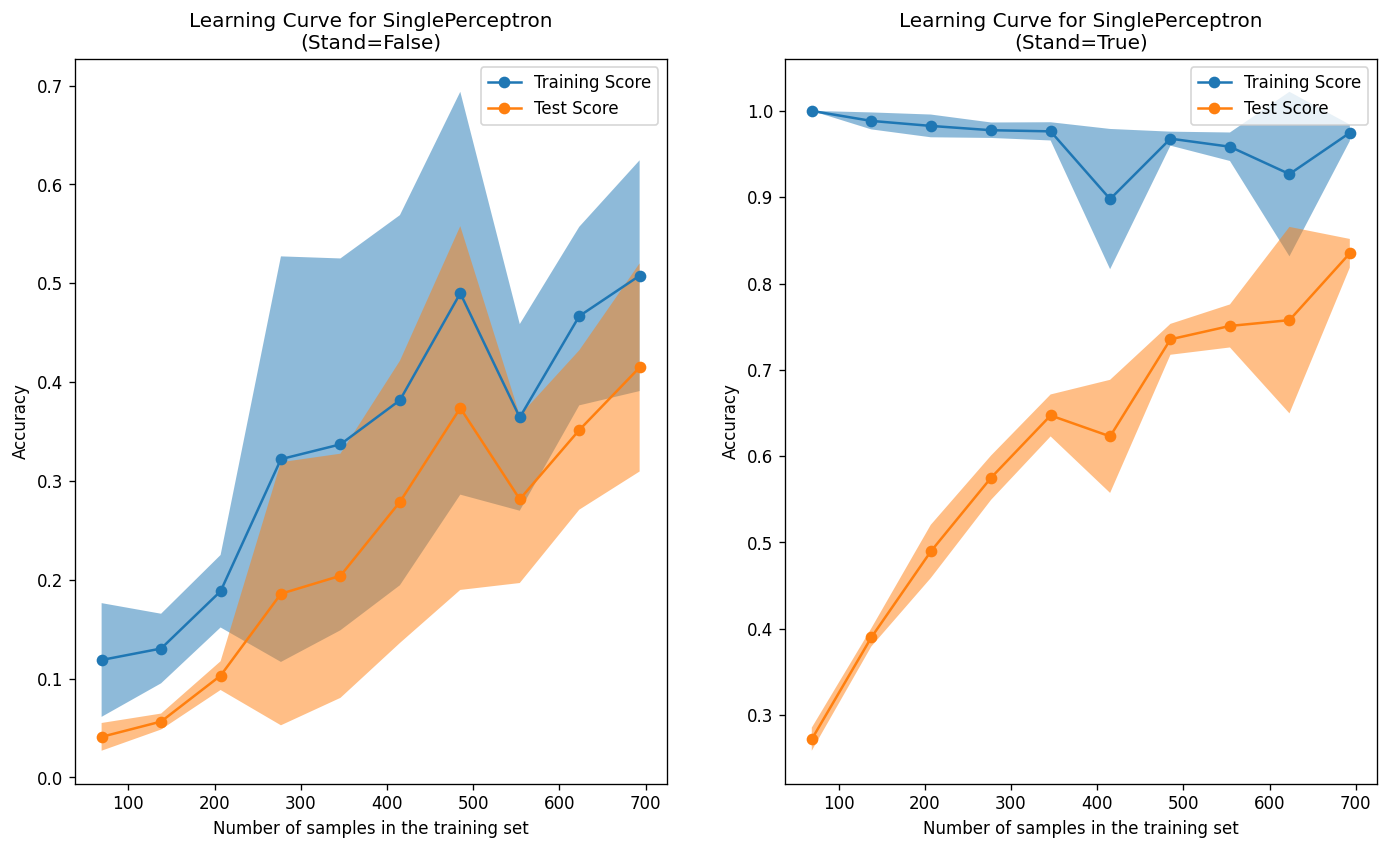

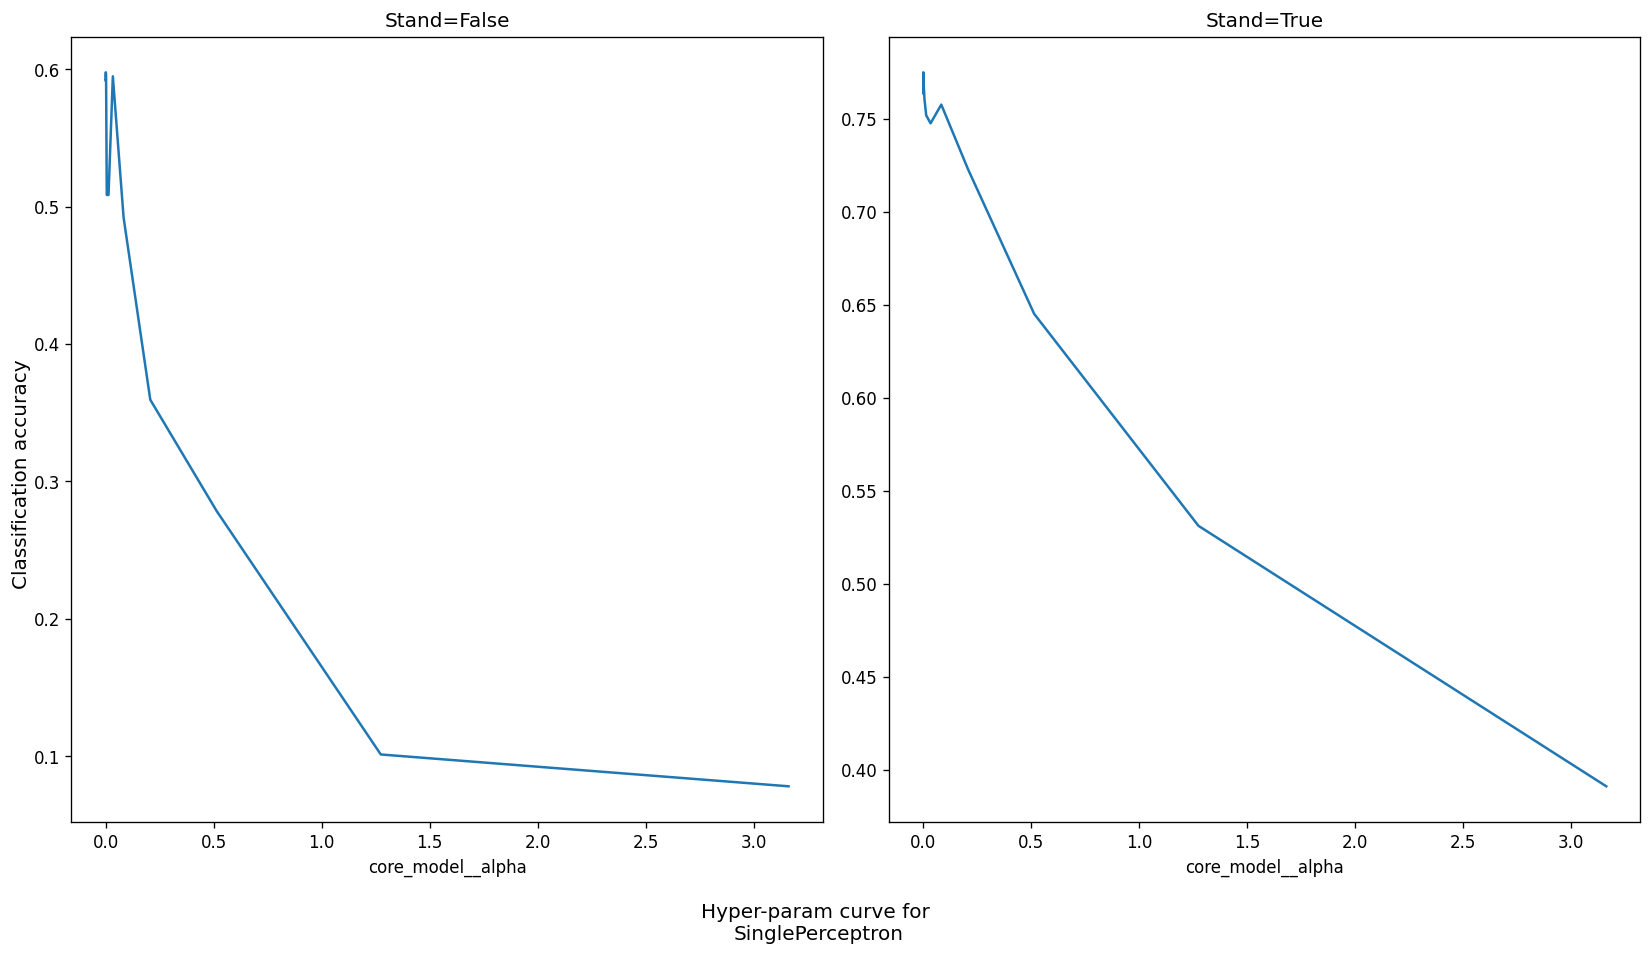

,[TRAIN] SinglePerceptron (Stand=False),[TEST] SinglePerceptron (Stand=False),[TRAIN] SinglePerceptron (Stand=True),[TEST] SinglePerceptron (Stand=True)
Accuracy,0.4054834054834055,0.3501683501683502,0.9422799422799423,0.8047138047138047
Precision,0.4054834054834055,0.3501683501683502,0.9422799422799423,0.8047138047138047
Recall,0.4054834054834055,0.3501683501683502,0.9422799422799423,0.8047138047138047
F1 Score,0.40548340548340545,0.3501683501683502,0.9422799422799423,0.8047138047138047
ROC AUC,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable,Not Applicable,Not Applicable


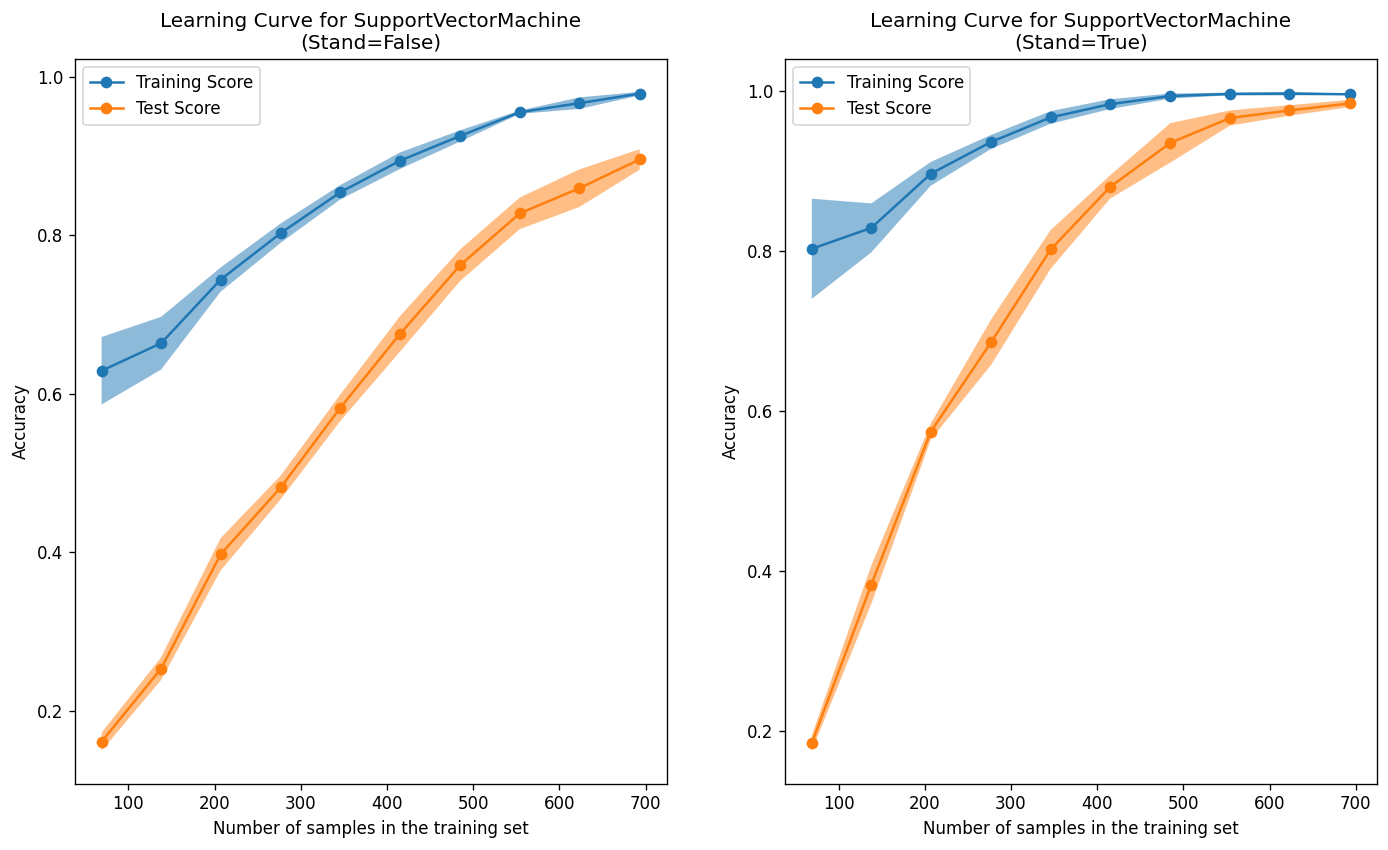

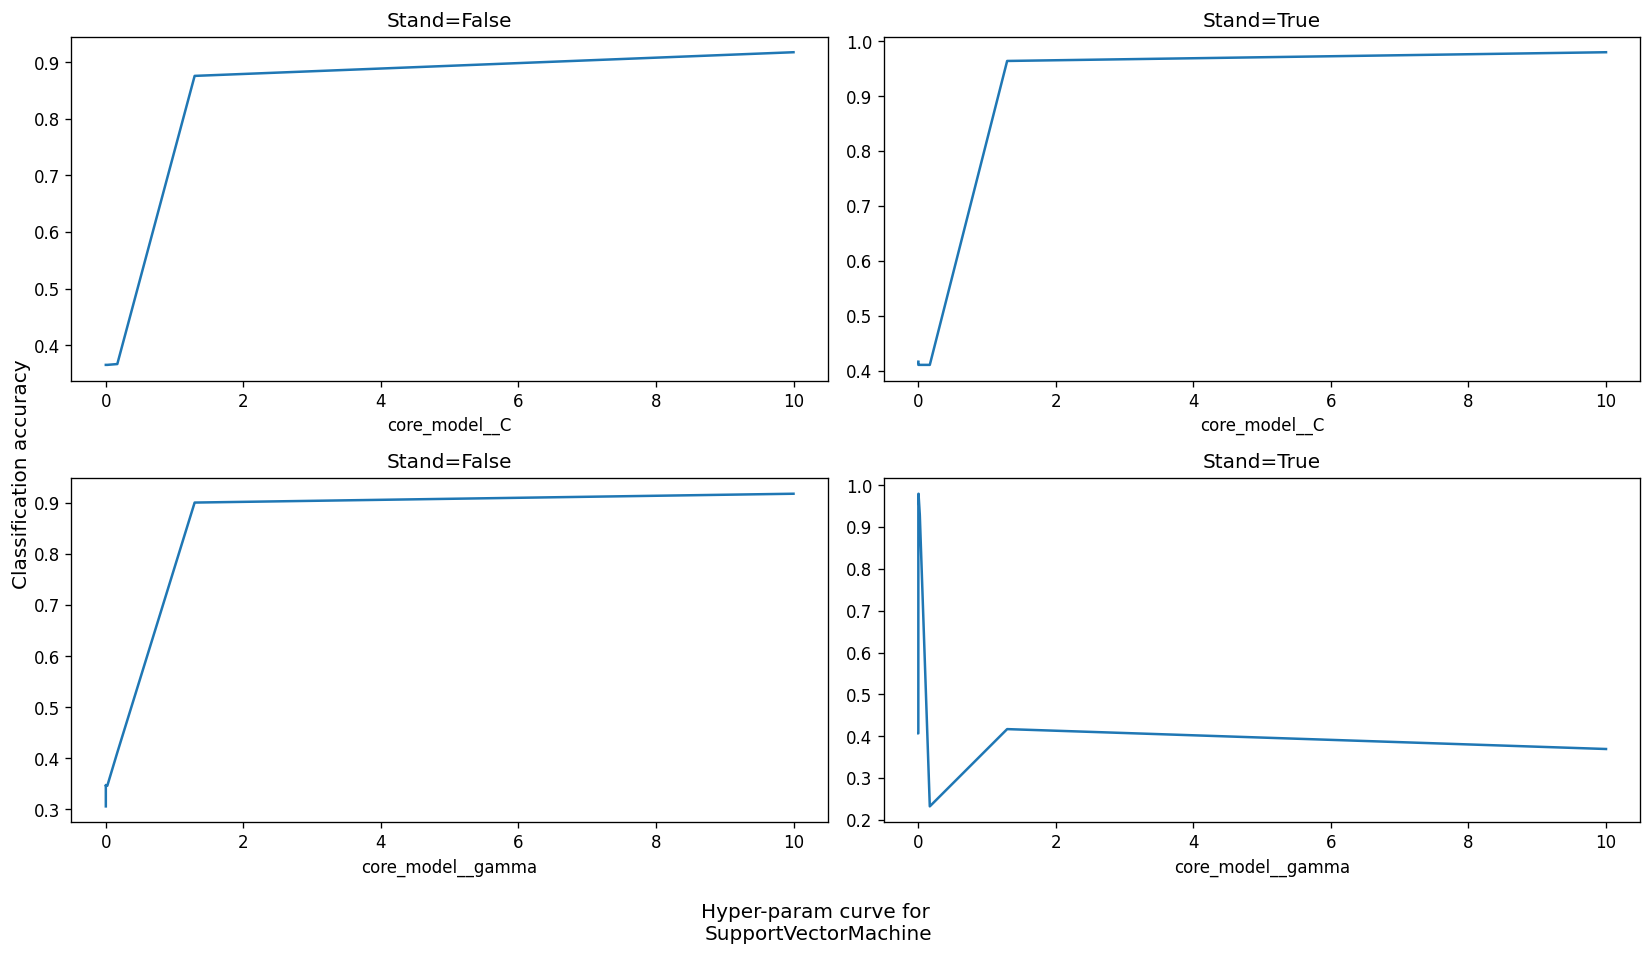

,[TRAIN] SupportVectorMachine (Stand=False),[TEST] SupportVectorMachine (Stand=False),[TRAIN] SupportVectorMachine (Stand=True),[TEST] SupportVectorMachine (Stand=True)
Accuracy,1.000000,0.905724,1.0000,0.962963
Precision,1.000000,0.905724,1.0000,0.962963
Recall,1.000000,0.905724,1.0000,0.962963
F1 Score,1.000000,0.905724,1.0000,0.962963
ROC AUC,1.000000,0.998397,1.0000,0.999817
Log loss,2.234619,2.494495,2.3005,2.471565


In [4]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)

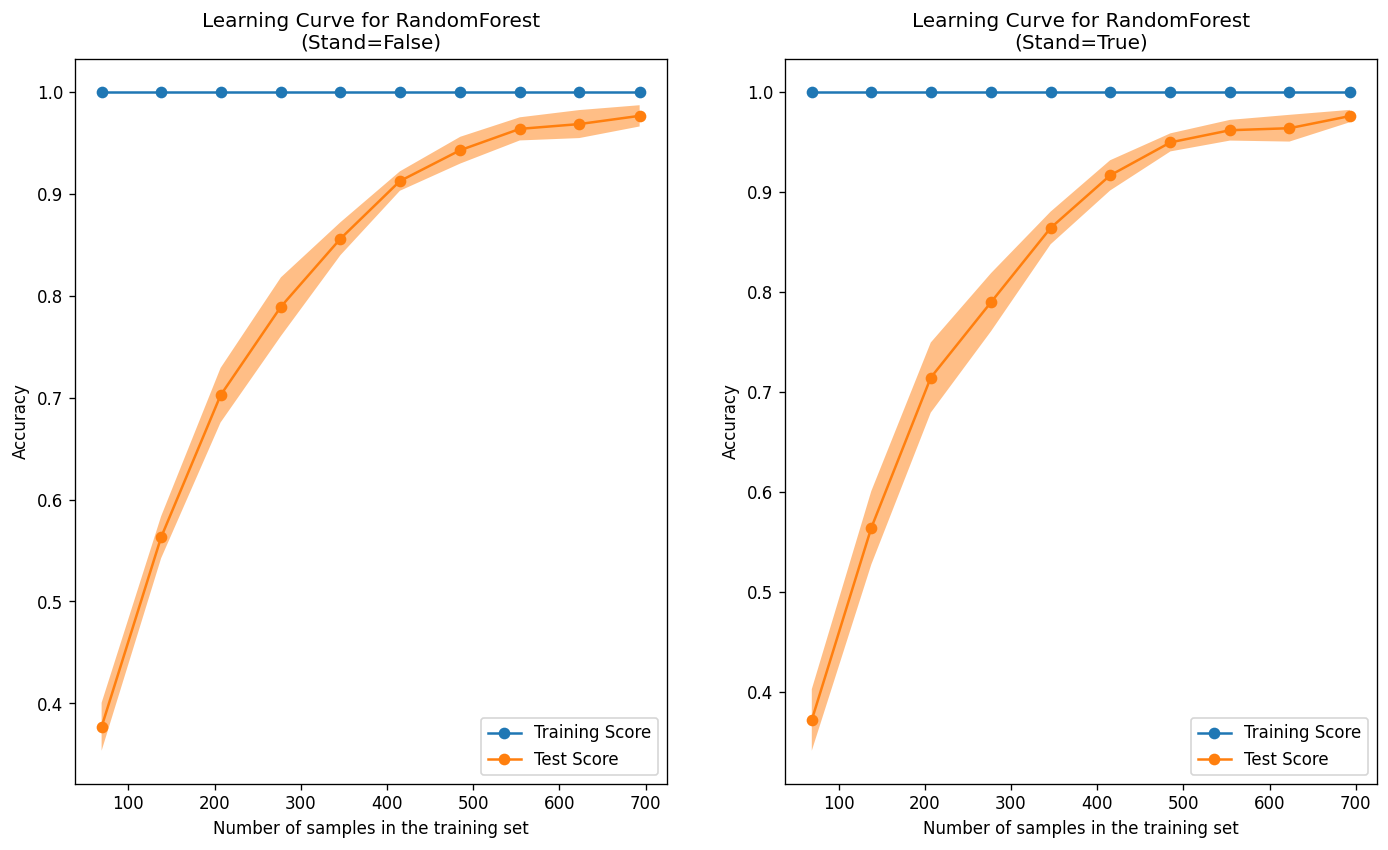

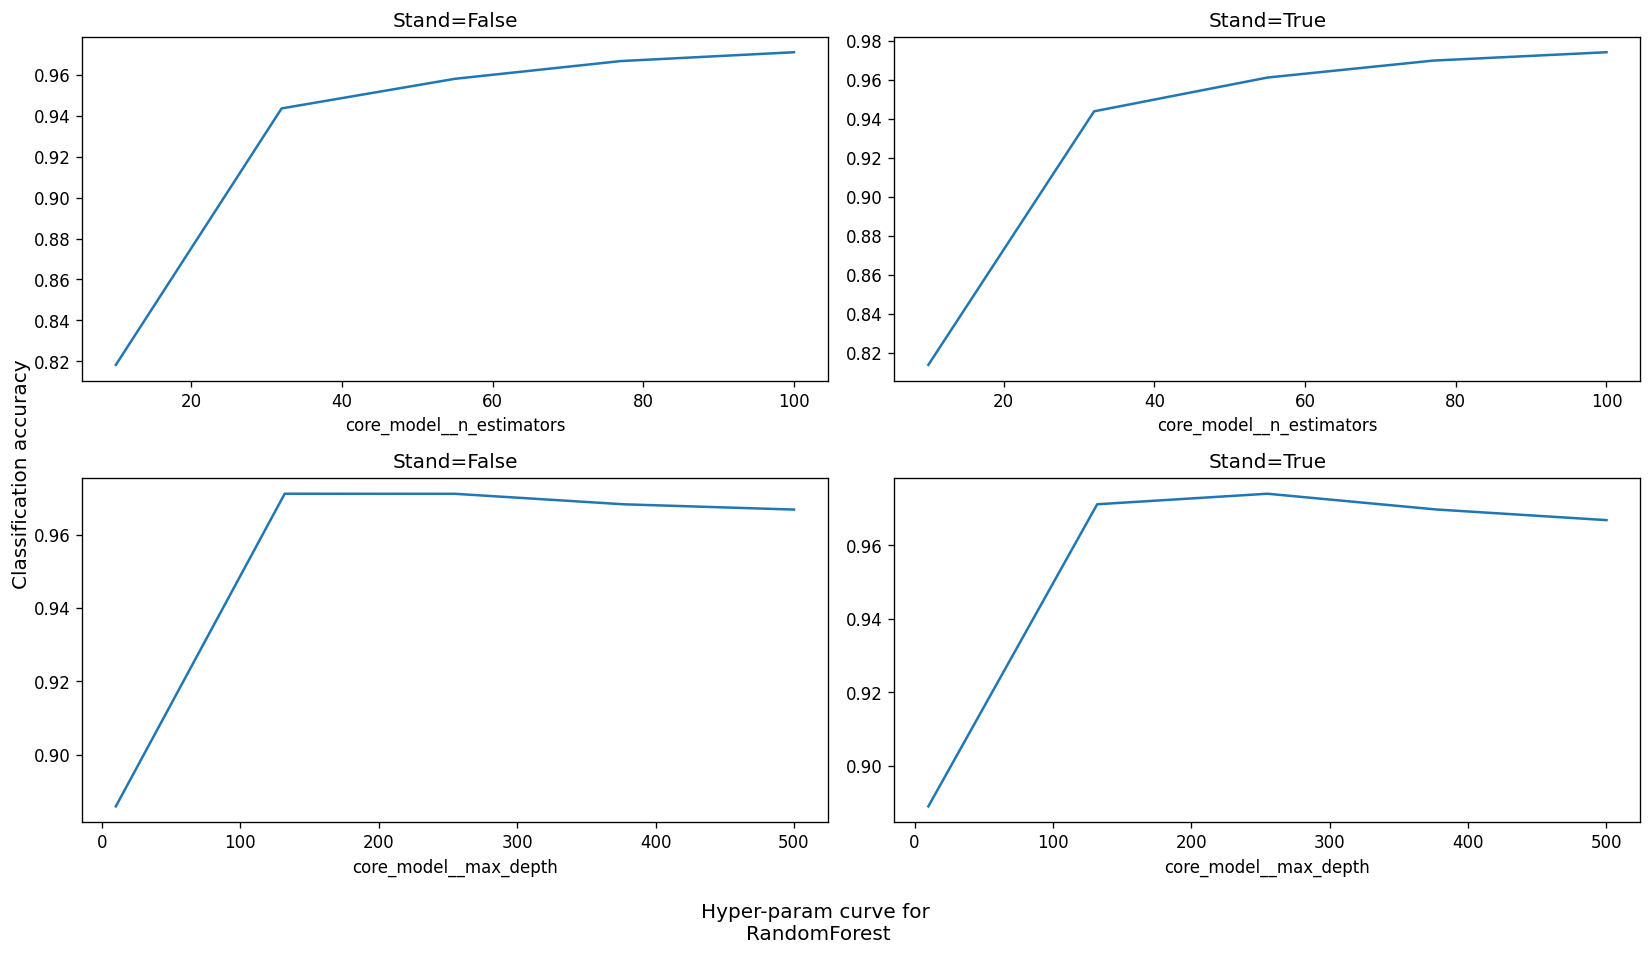

,[TRAIN] RandomForest (Stand=False),[TEST] RandomForest (Stand=False),[TRAIN] RandomForest (Stand=True),[TEST] RandomForest (Stand=True)
Accuracy,1.000000,0.986532,1.000000,0.973064
Precision,1.000000,0.986532,1.000000,0.973064
Recall,1.000000,0.986532,1.000000,0.973064
F1 Score,1.000000,0.986532,1.000000,0.973064
ROC AUC,1.000000,0.999926,1.000000,0.999880
Log loss,0.245112,0.823270,0.243359,0.827579


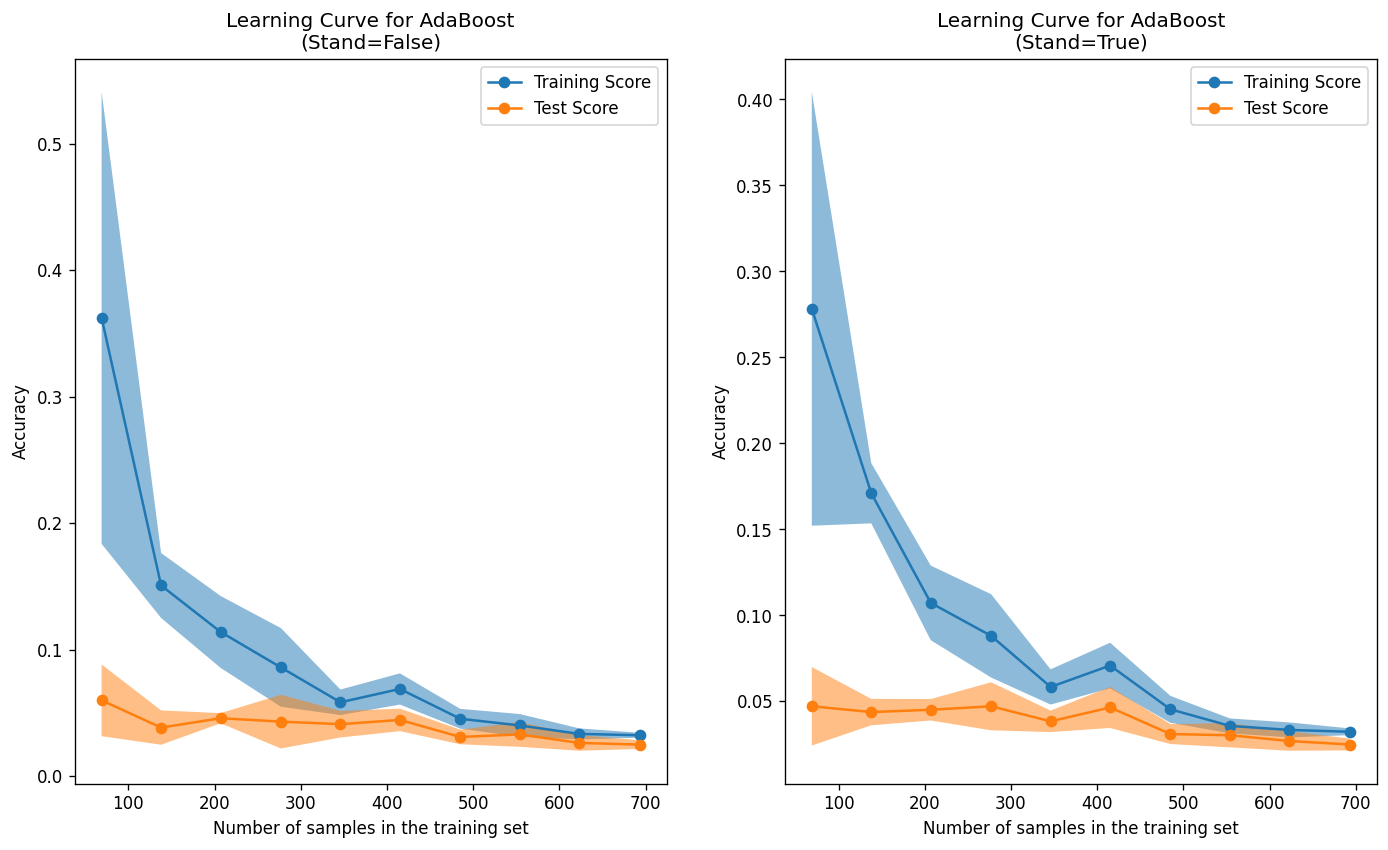

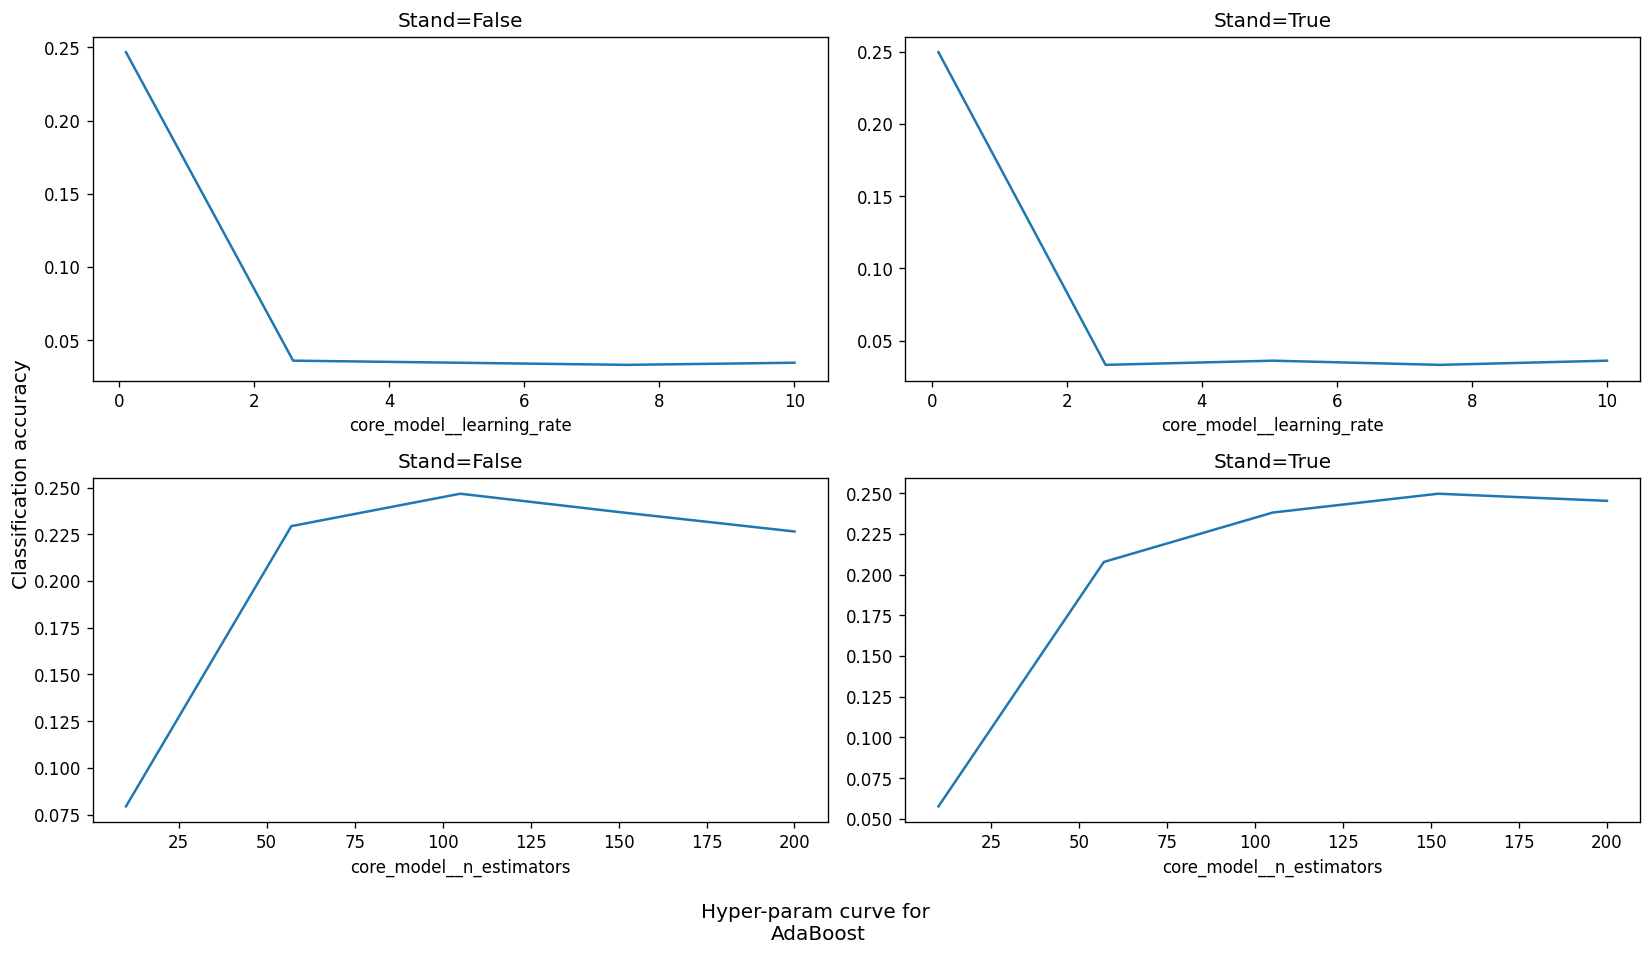

,[TRAIN] AdaBoost (Stand=False),[TEST] AdaBoost (Stand=False),[TRAIN] AdaBoost (Stand=True),[TEST] AdaBoost (Stand=True)
Accuracy,0.432900,0.265993,0.522367,0.360269
Precision,0.432900,0.265993,0.522367,0.360269
Recall,0.432900,0.265993,0.522367,0.360269
F1 Score,0.432900,0.265993,0.522367,0.360269
ROC AUC,0.987259,0.967968,0.991866,0.971117
Log loss,2.979071,3.217905,2.974660,3.201310


In [5]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

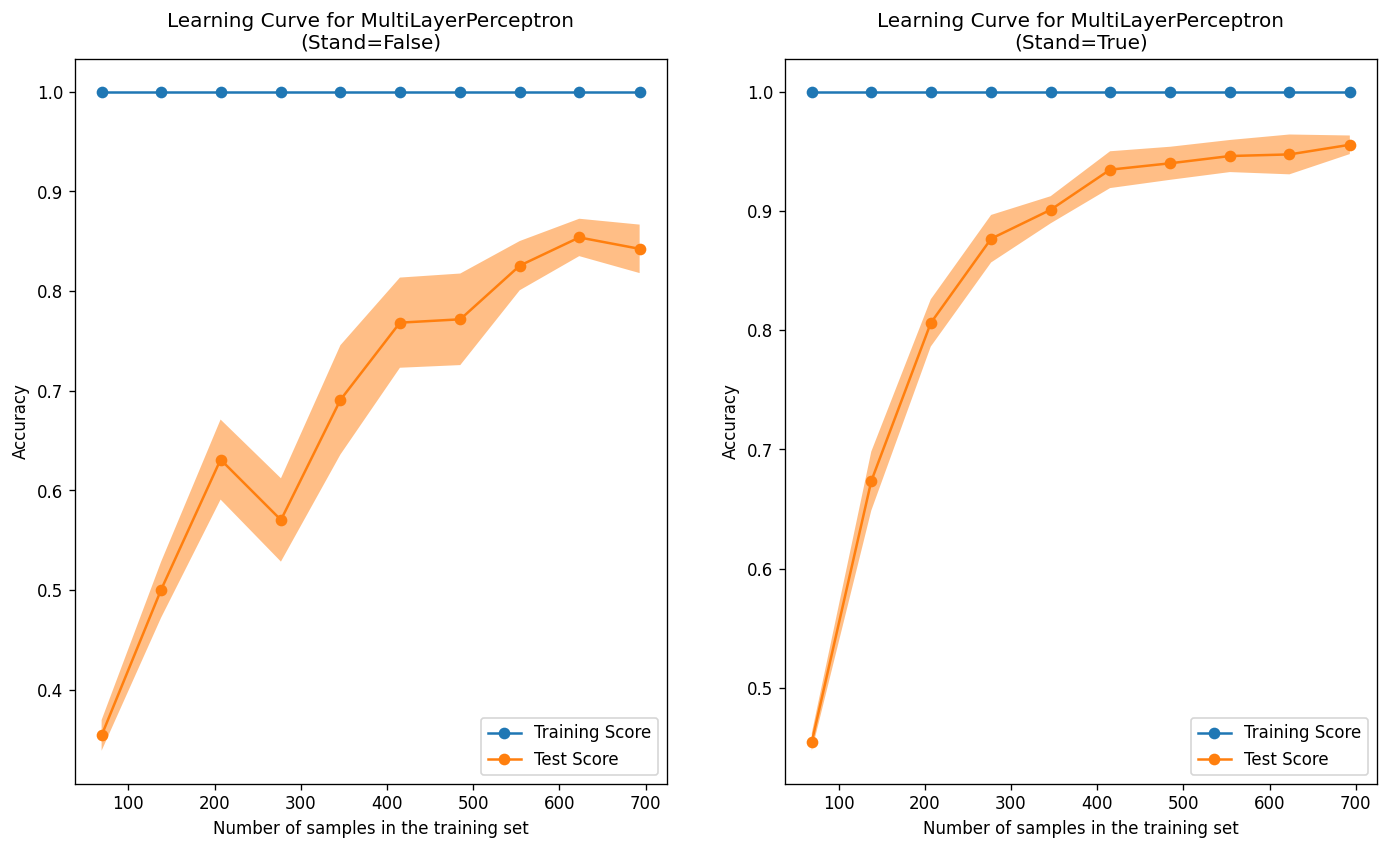

,[TRAIN] MultiLayerPerceptron (Stand=False),[TEST] MultiLayerPerceptron (Stand=False),[TRAIN] MultiLayerPerceptron (Stand=True),[TEST] MultiLayerPerceptron (Stand=True)
Accuracy,1.000000,0.875421,1.000000,0.952862
Precision,1.000000,0.875421,1.000000,0.952862
Recall,1.000000,0.875421,1.000000,0.952862
F1 Score,1.000000,0.875421,1.000000,0.952862
ROC AUC,1.000000,0.997818,1.000000,0.999874
Log loss,0.000165,1.422518,0.000068,0.192227


In [13]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

In [16]:
from models.Models import *

# Load Test Data
test_dl = DataLoader("data/test.csv", class_col_name="id")
test_dl.load()
submission_set = test_dl.get_dataset()

In [22]:
# Best out of all
lc = LogisticClassifier(stand_trans=True)
lc.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/logi_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,3.220041e-05,6.289754e-06,5.304482e-06,3.255833e-08,7.259778e-04,4.071644e-11,1.291548e-05,1.316249e-03,5.124966e-05,1.287503e-09,...,6.525089e-07,1.114615e-09,1.803607e-05,9.308253e-06,7.601393e-08,1.133942e-08,2.120648e-08,1.604525e-06,1.729018e-07,7.403507e-07
7,2.030044e-04,1.532752e-07,1.164946e-06,2.382005e-04,7.206330e-05,2.920118e-05,1.079465e-05,3.459210e-06,8.949617e-06,9.510087e-06,...,4.986941e-05,3.173867e-05,1.568375e-06,3.179462e-06,1.436532e-04,6.392501e-06,1.686982e-08,1.806779e-05,1.910729e-05,1.953545e-07
9,3.290015e-05,7.166218e-05,1.360351e-05,1.198555e-05,6.316510e-05,3.228246e-07,2.444299e-05,4.815326e-05,5.512143e-05,3.982292e-05,...,2.054175e-05,2.715701e-06,1.149176e-05,1.711016e-05,2.971618e-04,6.321697e-05,1.469825e-06,3.033033e-06,3.057733e-07,1.405553e-05
12,9.647201e-06,4.983807e-07,6.915282e-06,1.305196e-04,9.034902e-06,8.159310e-07,6.371775e-06,9.438696e-06,3.634221e-06,5.035887e-05,...,1.069280e-04,1.447238e-05,4.368117e-05,3.034260e-05,9.690095e-01,8.141884e-03,8.501640e-08,2.587815e-06,1.204503e-06,1.160546e-05
13,1.742683e-07,1.725370e-04,1.051907e-07,6.151519e-05,7.925441e-07,5.198411e-09,2.134280e-06,6.801590e-06,4.691097e-06,1.453379e-05,...,9.775110e-06,4.154326e-07,7.330197e-06,1.037700e-05,9.663643e-07,5.181407e-04,7.055309e-07,1.996987e-07,4.833432e-08,5.847151e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,9.221337e-06,3.725450e-05,4.742707e-06,7.933073e-06,4.463913e-05,3.245282e-07,1.320929e-05,9.388798e-06,8.316801e-06,1.572599e-05,...,7.235740e-06,9.456652e-07,5.448358e-06,5.427439e-06,7.521169e-05,1.529186e-04,6.654483e-07,4.969983e-06,1.241748e-07,1.436735e-05
1577,2.559221e-04,4.761810e-05,2.653421e-04,1.838277e-03,1.080694e-04,2.923703e-08,6.273654e-04,2.582548e-06,2.998291e-03,1.797541e-05,...,2.537490e-06,9.660695e-05,2.932411e-05,1.342345e-05,2.514802e-04,1.473693e-04,7.057664e-06,6.098557e-06,7.442887e-06,9.629133e-04
1579,2.397332e-07,1.699834e-05,3.237033e-03,3.332939e-09,6.254451e-06,4.758755e-10,9.937930e-01,1.060976e-05,3.227586e-04,1.353323e-08,...,1.919169e-07,1.857331e-05,9.478373e-05,2.325258e-06,8.107742e-07,2.733538e-08,2.480825e-04,3.866579e-08,8.787841e-06,6.366421e-06
1580,9.495261e-06,3.392143e-06,1.940860e-07,7.286687e-06,3.598101e-07,1.348652e-06,3.249841e-08,9.238519e-09,5.795715e-08,1.334739e-05,...,1.998500e-06,5.229385e-05,5.067915e-08,1.403153e-07,1.628397e-03,4.788070e-07,6.958277e-08,5.604868e-05,6.431195e-06,6.872311e-08


In [23]:
# 2nd best
mlp = MultiLayerPerceptron(stand_trans=True)
mlp.train(dataset)
probs, classes = mlp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/mlp_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,1.342393e-19,8.530359e-21,2.718335e-21,6.165920e-23,2.855018e-10,9.787538e-24,1.348818e-26,4.554500e-10,4.272542e-19,2.262251e-19,...,6.673822e-23,1.394086e-27,8.571760e-24,1.469776e-21,7.011350e-24,9.963934e-27,1.502190e-27,4.297396e-15,4.044203e-18,3.582299e-22
7,1.733136e-12,2.039947e-43,3.128467e-42,1.042728e-22,6.447500e-12,1.473769e-11,4.683797e-53,4.100160e-25,1.749371e-35,3.202936e-21,...,2.032947e-28,2.508124e-22,4.999311e-44,4.181656e-24,5.908863e-19,3.385425e-35,3.979397e-63,3.470592e-18,1.009025e-28,6.843950e-47
9,4.028179e-28,7.281863e-17,4.761071e-30,1.229082e-17,3.881960e-19,7.951141e-41,3.283939e-38,1.311607e-16,1.373260e-17,8.060954e-21,...,2.380616e-26,5.328763e-24,2.626256e-16,4.568513e-32,3.586600e-13,7.558448e-23,1.598690e-35,1.423741e-36,2.817862e-36,6.923863e-28
12,2.318635e-41,1.700897e-33,4.947564e-49,7.222375e-28,2.473515e-36,2.912342e-57,7.121085e-66,2.823241e-31,5.066533e-36,7.766988e-28,...,3.617602e-35,4.569676e-26,4.342977e-31,1.671045e-46,9.999118e-01,4.761458e-17,4.611274e-65,3.232086e-51,8.334794e-52,8.377612e-29
13,1.152764e-42,1.347953e-11,2.711813e-39,1.553624e-23,7.565595e-31,2.371491e-50,1.522521e-49,5.672514e-23,2.647846e-26,2.044212e-23,...,7.347273e-30,1.311598e-24,9.119116e-15,2.476907e-36,3.912316e-20,1.714908e-10,1.395064e-34,1.384726e-47,1.366167e-47,3.195183e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,4.808505e-29,5.695050e-20,1.083869e-29,9.289220e-19,1.209925e-19,3.887520e-41,6.250425e-40,6.254859e-20,7.435614e-20,8.960386e-25,...,4.217207e-28,4.538435e-26,1.564272e-19,2.789641e-34,2.344546e-14,6.424686e-23,1.365784e-36,5.313826e-38,1.094779e-37,9.545998e-29
1577,8.632683e-19,2.955655e-08,1.911706e-16,4.741332e-16,3.743926e-19,9.769519e-36,2.062134e-22,1.438201e-22,1.274818e-09,5.273860e-22,...,4.409633e-32,3.198710e-09,6.489557e-16,4.625862e-34,7.833101e-14,9.747386e-18,4.202722e-28,4.475695e-33,6.288063e-24,1.765408e-09
1579,1.040722e-22,1.221847e-15,5.469399e-07,1.566443e-24,1.142436e-14,1.715788e-25,9.999875e-01,5.060489e-15,9.236519e-13,3.195637e-25,...,2.775209e-28,2.910858e-18,4.564246e-21,3.874708e-29,2.494900e-21,1.990000e-29,5.207621e-11,3.546400e-24,9.300409e-13,9.964419e-20
1580,5.674512e-31,2.448453e-32,5.510896e-49,3.228506e-33,3.212255e-32,2.080276e-37,2.751045e-63,8.790727e-43,6.208724e-46,4.688326e-29,...,5.148663e-36,8.127612e-19,8.307988e-43,1.028319e-41,7.577690e-22,4.402621e-50,5.413025e-59,7.725595e-26,8.987220e-29,1.929930e-55


In [24]:
# 3rd best
svm = SupportVectorMachine(stand_trans=True)
svm.train(dataset)
probs, classes = svm.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/svm_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.007215,0.009045,0.009640,0.005577,0.021778,0.003312,0.012021,0.024299,0.010287,0.004072,...,0.004864,0.004523,0.009036,0.009290,0.004451,0.004775,0.005880,0.005529,0.010723,0.005831
7,0.028875,0.004545,0.006214,0.016452,0.011026,0.010966,0.008183,0.003694,0.007175,0.005799,...,0.007599,0.013901,0.005869,0.004598,0.015940,0.006778,0.003576,0.009948,0.018301,0.003966
9,0.011648,0.013456,0.010647,0.012627,0.010850,0.004517,0.012245,0.005725,0.011563,0.007057,...,0.004908,0.008327,0.008286,0.006027,0.011279,0.013100,0.005396,0.004561,0.009255,0.006702
12,0.012625,0.007724,0.007708,0.021032,0.007618,0.005109,0.008110,0.004539,0.008042,0.009910,...,0.008105,0.009791,0.009282,0.006535,0.093073,0.027494,0.004403,0.005019,0.009212,0.008166
13,0.007959,0.022877,0.006793,0.016322,0.006736,0.003470,0.008303,0.005394,0.008575,0.010283,...,0.006597,0.007267,0.011667,0.007175,0.007861,0.028703,0.006088,0.004185,0.007220,0.012250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.011860,0.013413,0.010550,0.013735,0.011305,0.004828,0.011938,0.005008,0.009657,0.007312,...,0.004714,0.008026,0.007594,0.005953,0.010636,0.016826,0.005215,0.005201,0.009158,0.007401
1577,0.016212,0.012475,0.015281,0.024738,0.009244,0.003179,0.016237,0.003412,0.021733,0.006470,...,0.003689,0.013024,0.007494,0.005114,0.010477,0.013701,0.005346,0.004655,0.010663,0.013918
1579,0.006935,0.009701,0.038615,0.004434,0.009646,0.003424,0.127508,0.006945,0.020370,0.003243,...,0.004098,0.011731,0.013023,0.005767,0.004626,0.004002,0.018992,0.004068,0.017815,0.006555
1580,0.014373,0.011325,0.006855,0.010603,0.007772,0.007434,0.006749,0.004683,0.006225,0.010152,...,0.007125,0.016182,0.006615,0.005374,0.021188,0.007380,0.005829,0.011526,0.017626,0.006246


In [25]:
rf = RandomForest(stand_trans=True)
rf.train(dataset)
probs, classes = rf.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rf_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.03,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.0,...,0.01,0.01,0.00,0.01,0.07,0.00,0.00,0.01,0.01,0.00
9,0.00,0.00,0.00,0.00,0.02,0.00,0.03,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12,0.04,0.00,0.01,0.02,0.01,0.00,0.00,0.01,0.00,0.0,...,0.02,0.00,0.00,0.00,0.30,0.06,0.00,0.01,0.00,0.00
13,0.00,0.05,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.0,...,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1577,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.0,...,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.03
1579,0.00,0.01,0.02,0.00,0.01,0.00,0.29,0.00,0.04,0.0,...,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.01,0.00
1580,0.03,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.0,...,0.00,0.04,0.00,0.00,0.02,0.00,0.00,0.05,0.02,0.00


In [26]:
ab = AdaBoost(stand_trans=True)
ab.train(dataset)
probs, classes = ab.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/ab_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.005830,0.017070,0.002458,0.000568,0.018059,0.001651,0.025200,0.030336,0.003990,0.000170,...,0.006281,0.005865,0.000743,0.047847,0.000592,0.000577,0.008162,0.000512,0.035308,0.000579
7,0.021774,0.010919,0.026252,0.002477,0.004937,0.012696,0.036729,0.001444,0.032101,0.001406,...,0.009184,0.053222,0.001982,0.002094,0.034976,0.002517,0.019206,0.003023,0.070191,0.004410
9,0.011369,0.048214,0.001322,0.007686,0.038397,0.000877,0.013674,0.015998,0.002172,0.002101,...,0.003436,0.003093,0.000410,0.014810,0.001231,0.007809,0.004317,0.000282,0.018631,0.007660
12,0.029237,0.010365,0.025234,0.002810,0.004737,0.004729,0.035183,0.001658,0.030697,0.000930,...,0.008204,0.071459,0.002565,0.002007,0.046382,0.002820,0.022191,0.002541,0.081386,0.005002
13,0.023643,0.055362,0.002741,0.015801,0.029031,0.001038,0.014465,0.009144,0.002488,0.004255,...,0.006995,0.006429,0.000716,0.008376,0.002512,0.016069,0.006636,0.000579,0.021254,0.013489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.011369,0.048214,0.001322,0.007686,0.038397,0.000877,0.013674,0.015998,0.002172,0.002101,...,0.003436,0.003093,0.000410,0.014810,0.001231,0.007809,0.004317,0.000282,0.018631,0.007660
1577,0.013512,0.032616,0.009387,0.009437,0.017795,0.000632,0.044447,0.014127,0.028330,0.002646,...,0.004280,0.010495,0.000424,0.004962,0.021236,0.009586,0.003817,0.000360,0.034635,0.022959
1579,0.005249,0.015483,0.007546,0.000517,0.016826,0.001491,0.088902,0.019251,0.051730,0.000155,...,0.005861,0.015093,0.000680,0.025124,0.007625,0.000525,0.007371,0.000484,0.090648,0.001490
1580,0.040006,0.034783,0.011975,0.003192,0.006238,0.005241,0.014593,0.000855,0.003437,0.001038,...,0.008787,0.040253,0.003443,0.002727,0.003203,0.003203,0.035510,0.003228,0.039448,0.002765
